# Q6

In [107]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

## part a

<h3> in this section we want to implement : </h3>

1.   Averaging Blurring
2.   Median Blurring
3.   Gaussian Blurring

<h3> you should define reflect101 padding function and use it befor blurring </h3>
<h3><b> note : you can't use libraries in this section </b></h3>
<h3><b> note : you can't use loop in Reflect101 function </b></h3>




In [108]:
def Reflect101(img, filter_size):
    '''
    Do not use loop (like while and for)
    Do not use libraries
    calculate averaging filter
    input(s):
        img (ndarray): input image
        filter_size (ndarray): filter size
    output(s):
        image (ndarray): computed Reflect101
    '''
    pad = filter_size // 2
    img = np.pad(img, ((pad, pad), (pad, pad)), 'reflect')
  
    kernel = np.ones((filter_size, filter_size)) / (filter_size ** 2)
    image = np.sum(np.multiply(img, kernel), axis=(2, 3))
  
    return image.astype(np.uint8)

In [109]:
def Averaging_Blurring(img, filter_size):
    '''
    Do not use libraries
    input(s):
        img (ndarray): input image
        filter_size (ndarray): filter size
    output(s):
        result (ndarray): computed averaging blurring
    '''
    image = Reflect101(img, filter_size)
    result = np.zeros_like(img)
  
    kernel = np.ones((filter_size, filter_size)) / (filter_size ** 2)
    result = np.sum(np.multiply(image, kernel), axis=(2, 3))
  
    return result.astype(np.uint8)
      

In [110]:
def Median_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed median blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))
  
  kernel = np.ones((filter_size, filter_size)) / (filter_size ** 2)
  result = np.median(np.multiply(image, kernel), axis=(2, 3))

  return result.astype(np.uint8)

In [111]:
def Gaussian_Blurring(img, filter_size, std):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (tuple): filter size
      std (float): std of gaussian kernel
    output(s):
      result (ndarray): computed gaussian blurring
    '''
    # Create a 1D Gaussian kernel
    kernel_1d = np.linspace(-(filter_size // 2), filter_size // 2, filter_size)
    kernel_1d = np.exp(-0.5 * (kernel_1d ** 2) / (std ** 2))
    kernel_1d /= np.sum(kernel_1d)
    
    # Convert the 1D kernel to a 2D kernel
    kernel = np.outer(kernel_1d, kernel_1d)
    
    # Filter the image using the Gaussian kernel
    output = Reflect101(img, filter_size)
    result = np.sum(np.multiply(output, kernel[..., np.newaxis]), axis=(2, 3))
    
    return result.astype(np.uint8)

In [112]:
# Do not change this cell
image = cv2.imread('images/taj.jpg',cv2.IMREAD_GRAYSCALE)

ValueError: operands could not be broadcast together with shapes (314,314) (15,15) 

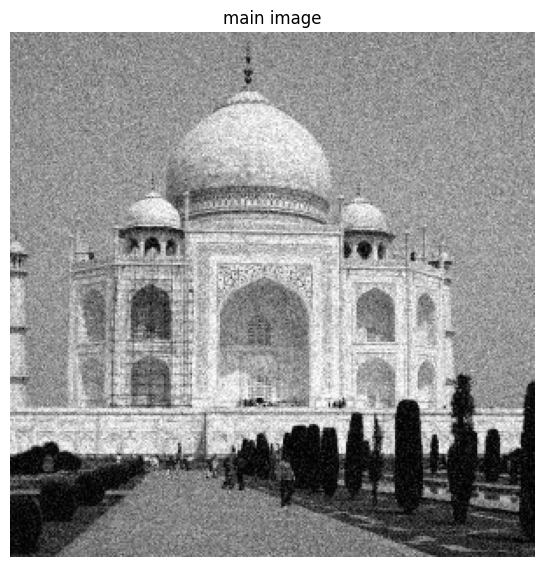

In [113]:
# Do not change this cell
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title("main image")
plt.axis("off")

AB = Averaging_Blurring(image,15)
plt.subplot(2,2,2)
plt.imshow(AB,cmap='gray')
plt.title("Averaging Blurring")
plt.axis("off")

MB = Median_Blurring(image,15)
plt.subplot(2,2,3)
plt.imshow(MB,cmap='gray')
plt.title("Median Blurring")
plt.axis("off")

GB = Gaussian_Blurring(image,15,40)
plt.subplot(2,2,4)
plt.imshow(GB,cmap='gray')
plt.title("Gaussian Blurring")
plt.axis("off")


## part b

<h3> in this section we want to implement Bilateral Filtering </h3>
<h3> first you need to read about it and write about it in your report </h3>
<h3><b> note : you can't use libraries in this section </b></h3>


In [216]:
def Bilateral_Filtering(img, filter_size, std, rstd):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (tuple): filter size
      std (float): value of std in the coordinate space
      rstd (float): value of std in the color space
    output(s):
      result (ndarray): computed Bilateral blurring
    '''
    result = img.copy()
    #######################
    #    your code here   #
    #######################
    return result

In [ ]:
# Do not change this cell
bilateral = Bilateral_Filtering(image, 15, 40, 40)
cv2_imshow(bilateral)

## part c

<h3> in this section we want to implement all blurrings with opencv and compare their with part b </h3>
<h3><b> note : for comparison, the parameters should be the same as in part b </b></h3>

In [218]:
AveragingBlurring = ## your code here ##
MedianBlurring = ## your code here ##
GaussianBlurring = ## your code here ##
Bilateral = ## your code here ##

In [ ]:
# Do not change this cell
Array = [AveragingBlurring, MedianBlurring, GaussianBlurring, Bilateral]
titles = ['Averaging Blurring', 'Median Blurring', 'Gaussian Blurring', 'Bilateral']
plt.figure(figsize=(15,15))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(Array[i],cmap='gray')
  plt.title(titles[i])
  plt.axis("off")